Sales Analysis Using Python

Import necessary Libraries

In [1]:
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

Marge all the sales data into a single csv file

In [2]:
files = [file for file in os.listdir("E:/dekstop moved ap/Data set/sales_analysis")]

df = pd.DataFrame()
for file in files:
    single_df = pd.read_csv("E:/dekstop moved ap/Data set/sales_analysis/" + file)
    df = pd.concat([single_df , df])

df.to_csv("E:/dekstop moved ap/Data set/sales_analysis/all_month_data.csv" , index=False)


Read the new file


In [3]:
df = pd.read_csv("E:/dekstop moved ap/Data set/sales_analysis/all_month_data.csv")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301"


Data Cleaning

In [4]:
print(df.shape)
print(df.isnull().sum())

(186850, 6)
Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64


Droping the missing Values and duplicated valuse

In [5]:
df.dropna(inplace=True)
df.isnull().sum()
df.shape

(186305, 6)

In [6]:
df = df[df['Order ID'] != 'Order ID']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301"


In [7]:
df.duplicated().sum()

264

In [8]:
df.shape

(185950, 6)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [10]:
df['Quantity Ordered'] = df['Quantity Ordered'].astype('int32')
df['Price Each'] = df['Price Each'].astype('float32')


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int32  
 3   Price Each        185950 non-null  float32
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
dtypes: float32(1), int32(1), object(4)
memory usage: 8.5+ MB


Add a month column

In [12]:
df['Month'] = df['Order Date'].str[0:2].astype('int32')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,248151,AA Batteries (4-pack),4,3.840000,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",9
1,248152,USB-C Charging Cable,2,11.950000,09/29/19 10:19,"511 8th St, Austin, TX 73301",9
2,248153,USB-C Charging Cable,1,11.950000,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",9
3,248154,27in FHD Monitor,1,149.990005,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",9
4,248155,USB-C Charging Cable,1,11.950000,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",9


Add a sales column

In [13]:
df['sales'] = (df['Quantity Ordered'] * df['Price Each'])
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales
0,248151,AA Batteries (4-pack),4,3.840000,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",9,15.360000
1,248152,USB-C Charging Cable,2,11.950000,09/29/19 10:19,"511 8th St, Austin, TX 73301",9,23.900000
2,248153,USB-C Charging Cable,1,11.950000,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",9,11.950000
3,248154,27in FHD Monitor,1,149.990005,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",9,149.990005
4,248155,USB-C Charging Cable,1,11.950000,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",9,11.950000


Question 1 : What was the best month for sale ? How much was earned that month ?

In [14]:
total_sales = df.groupby('Month').sum()

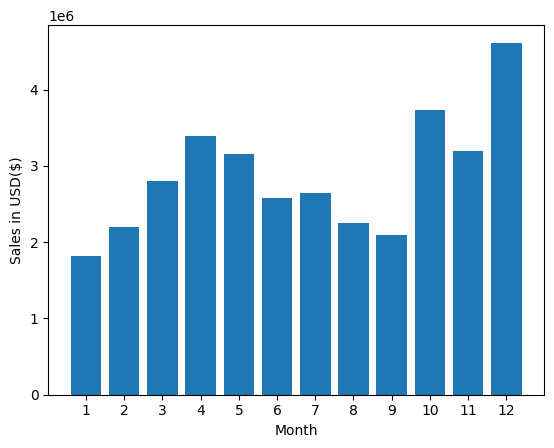

In [15]:
month = range(1,13)
plt.bar(month , total_sales['sales'])
plt.xticks(month)
plt.xlabel('Month')
plt.ylabel('Sales in USD($)')
plt.show()

In [16]:
df.groupby('Month').sum()['sales'].max()

4613443.316063166

Ans 1 : December was the best month for sale and the amount of sale was 4613443.316063166 $

Question 2: What city had the heighest number of sales?

In [17]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales
0,248151,AA Batteries (4-pack),4,3.840000,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",9,15.360000
1,248152,USB-C Charging Cable,2,11.950000,09/29/19 10:19,"511 8th St, Austin, TX 73301",9,23.900000
2,248153,USB-C Charging Cable,1,11.950000,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",9,11.950000
3,248154,27in FHD Monitor,1,149.990005,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",9,149.990005
4,248155,USB-C Charging Cable,1,11.950000,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",9,11.950000


In [32]:
def city(x):
    return x.split(',')[1]
def state(x):
    return x.split(',')[2].split(' ')[1]
df['city']=df['Purchase Address'].apply(lambda x:f"{city(x)} ({state(x)})")

In [33]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city
0,248151,AA Batteries (4-pack),4,3.840000,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",9,15.360000,Los Angeles (CA)
1,248152,USB-C Charging Cable,2,11.950000,09/29/19 10:19,"511 8th St, Austin, TX 73301",9,23.900000,Austin (TX)
2,248153,USB-C Charging Cable,1,11.950000,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",9,11.950000,Los Angeles (CA)
3,248154,27in FHD Monitor,1,149.990005,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",9,149.990005,Seattle (WA)
4,248155,USB-C Charging Cable,1,11.950000,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",9,11.950000,Atlanta (GA)


In [36]:
total_sales_by_city = df.groupby(['city']).sum()

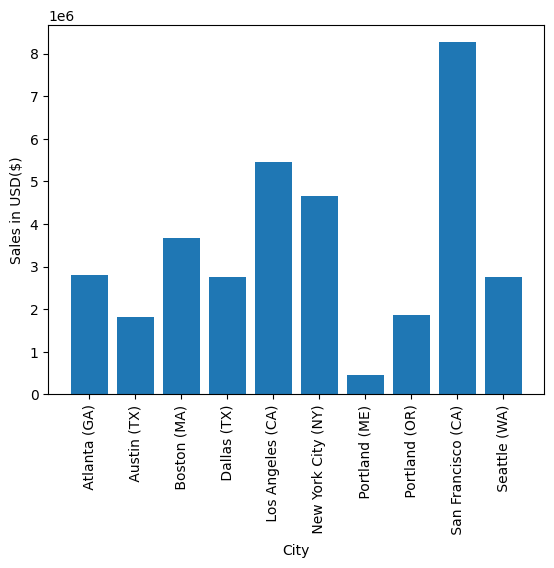

In [44]:
cityy = [city for city,df in df.groupby('city')]
plt.bar(cityy , total_sales_by_city['sales'])
plt.xticks(cityy,rotation = 90)
plt.xlabel('City')
plt.ylabel('Sales in USD($)')
plt.show()

In [45]:
df.groupby('city').sum()['sales'].max()

8262203.869146585

Answer 2: San Francisco (CA) had the highest number of sales and the value was 8262203.869146585

Question 3: What time should we display advertisemens to maximize the likelihood of customer’s buying product?

In [46]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city
0,248151,AA Batteries (4-pack),4,3.840000,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",9,15.360000,Los Angeles (CA)
1,248152,USB-C Charging Cable,2,11.950000,09/29/19 10:19,"511 8th St, Austin, TX 73301",9,23.900000,Austin (TX)
2,248153,USB-C Charging Cable,1,11.950000,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",9,11.950000,Los Angeles (CA)
3,248154,27in FHD Monitor,1,149.990005,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",9,149.990005,Seattle (WA)
4,248155,USB-C Charging Cable,1,11.950000,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",9,11.950000,Atlanta (GA)


In [ ]:
z